# <center>Leveraging Machine Learning to Forecast Customer Retention at Syriatel Mobile Telecom</center>

## Introduction

Business growth and development are key drivers in organizational decision-making, with leaders aiming to increase revenues, clientele, and profitability while minimizing losses. In recent years, customer satisfaction has emerged as a crucial factor in achieving these goals, as businesses rely on customers for sales, revenue, and profits. This highlights the importance of retaining existing customers.

Technological advancements have intensified competition, particularly due to the rise of startups and market saturation. As acquiring new customers becomes more challenging and costly, businesses are increasingly focusing on strengthening relationships with their current customers.

In this project, I will be coming up with prediction models that will help provide insights on customer churning patterns.Below is
the project structure:

a). **Business Understanding**
b). **Data Understanding**
c). **Data Preparation**
d). **Exploratory Data Analysis**
e). **Modelling**
f). **Model Evaluation**
g). **Recommendations and Conclusions**

## Business Understanding
In response to increasing competition, technological advancements, and globalization in the telecommunications market, Syriatel Mobile Telecom has emphasized the importance of enhancing customer satisfaction and retaining its customers. The company reaffirms its commitment to maintaining its market position by prioritizing customer satisfaction and social responsibility.

While these efforts have been successful, Syriatel must further intensify its focus on reducing customer churn rates to safeguard its market position, profitability, and growth. Retaining its customer base will help the company reduce costs, prevent losses, and boost sales. Additionally, it will increase ROI, lower marketing expenses, enhance customer loyalty, and encourage new customer acquisition through referrals.

This project will enable Syriatel to identify customers most likely to churn, allowing the company to implement strategic policies to ensure retention.The project will focus on identifying potential churners within Syriatel's customer base and making strategic business decisions to retain them

As the primary stakeholder, Syriatel stands to benefit from this model by reducing customer churn rates, leading to increased revenues, profits, and market position. Customers will enjoy enhanced telecommunication services and improved customer support. As the company grows through higher revenues, profits, and market share, shareholders will see increased returns on their investments, and employees will benefit from better compensation and bonuses.

This project seeks to deliver value to all stakeholders by identifying patterns in customer churn, enabling Syriatel to take proactive measures to retain customers and minimize revenue loss.

**Objectives:**
1. To Find out the key features that determine if a customer is likely to leave.
2. To Find out the most suitable model to predict Customer Churn.
3. To determine Customer retention strategy to reduce churning


## Data Understanding
The Churn in Telecom dataset from Kaggle provides information on customer activity and whether they canceled their subscription with the telecom company. The goal of this dataset is to develop predictive models that can help the telecom business reduce revenue losses due to customer churn.

The dataset consists of 3,333 entries and 21 columns, including details such as state, account length, area code, phone number, international plan, voice mail plan, usage statistics, customer service calls, and churn status.







## Data Preparation
In this section,several actions are taken to prepare our data for exploratory data analysis and modelling. The actions include importing all the necessary libraries, loading the dataset using pandas library, previewing the data and conducting thorough data preprocessing.

In [1]:
# Importing all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#Loading the data into a pandas dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
#Checking the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

As revealed above, The dataset has 3333 rows records and 21 columns.The dataset does not have any nulls values. However, this triggers the need to review each column further to identify anomalies. four of the columns are of the object type, while eight are of integer type, eight as floats, and one column as bolean.  Our target variable column is churn, which means the rest of the columns are features.



In [4]:
# checking the first 10 rows
df.head(10)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [5]:
# Checking the last 10 rows
df.tail(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3323,IN,117,415,362-5899,no,no,0,118.4,126,20.13,...,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,377-1164,no,no,0,169.8,114,28.87,...,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,368-8555,no,no,0,193.4,99,32.88,...,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
# checking for the general shape of the df
df.shape

(3333, 21)

In [7]:
#Viewing the statistical summary details
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000



**Data Cleaning**

In [8]:
#confirming that there no missing values (nan) in the dataframe
missing_values = df.isnull().sum()
print(missing_values)

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


There are no null values in the dataset. However,its important to review dataset further to identify values that are not a representation of the data



In [9]:
# checking for value_count for the different state abbreviations un the State column
df['state'].value_counts()

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

As the state column represents area code, there is no need to check for duplicates as several subsribers can reside in the same state.

However, because we have both state and area code, we will drop state and use area code to reference geographical location. 

In [10]:
# dropping the state column
df = df.drop('state', axis=1)

In [11]:
#confirming that the state column does not exist in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [12]:
# checking account length column
df['account length'].value_counts()

account length
105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: count, Length: 212, dtype: int64

Given account length isn't unique, and no null and missing values. There is no need for further checks on this column

In [13]:
df['area code'].unique()

array([415, 408, 510], dtype=int64)

In [14]:
df['area code'].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

Same as the account length column, the column has no missing values and any other unexpected unique item. No further cleaning for this column

In [15]:
df['phone number']

0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone number, Length: 3333, dtype: object

In [16]:
df['phone number'].unique

<bound method Series.unique of 0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone number, Length: 3333, dtype: object>

As the Phone number column is the unique Identifier, cleaning it and checking for any duplicates is necessary.It is not expected for same phone number to be used by two different subscribers.

As was previously observed, phone_number column is of object datatype. Lets change this column's data type to integer data type.



In [17]:
# Removing the hyphen in the values and converting the column values to integer
df['phone number'] = df['phone number'].str.replace('-', '').astype(int)

In [18]:
# checking if the changes we have made have been effected
df['phone number']

0       3824657
1       3717191
2       3581921
3       3759999
4       3306626
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone number, Length: 3333, dtype: int32



The next step is checking and removing duplicates in the phone number column.

In [19]:
# Check for duplicates in the 'phone number' column
duplicates = df.duplicated('phone number')

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = df[duplicates]
duplicate_rows

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


There are no duplicates in the phone number column.As this column is a unique identifier,we can make it the index column in our dataset.



In [20]:
# making phone_number column to be the index column 
df.set_index('phone number', inplace=True)

In [21]:
# Checking if the above modification has been effected
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 3824657 to 4004344
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-nul

In [22]:
# checking how the dataset looks after making some modifications
df

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
phone number,,,,,,,,,,,,,,,,,,,
3824657,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
3717191,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3581921,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3759999,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
3306626,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144276,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3703271,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3288230,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [23]:
# Counting the occurrences of responses in this column
Internationalplancounts = df['international plan'].value_counts()
Internationalplancounts

international plan
no     3010
yes     323
Name: count, dtype: int64

there are only 'yes' and 'no' responses. This means that information stored in this column is whether a client has an international plan or not. In that case, no need for further cleaning

Now lets look into the Voice Mail Plan Column. Given this column is of object type same as the international plan column, I will repeat the same to confirm on unique entries and counts in this column

In [24]:
# Counting the occurrences of responses in this column
voicemailplancounts = df['voice mail plan'].value_counts()
voicemailplancounts

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

From above, there are only 'yes' and 'no' responses in this column without any other unique entry. No need for cleaning

From Above, all entries are valid and the column entries are good to go with without further cleaning.


Having confirmed no missing value, in the df, we will look at the value_count of all unqiue entries in this column to check for any anormalies

In [25]:
#reviewing the churn column
df.churn.value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

The column does not appear to have any missing values.There are 2850 false values, indicating the number of clients who did not leave. There are also 483 true value`, indicating the number of clients who left the the company.

## Exploratory Data Analysis

In this section, I am going to conduct Univariate,Bivariate and multivariate analysis.

This data exploration tends to identify possible correlations among the features and distribution of variables.

### Univariate Analysis

Univariate data analysis involves analyzing a single variable.

I will start with the target variable column churn to identify its distribution. This categorical variable with boolean values True and False, indicating whether the client will probably churn or not.



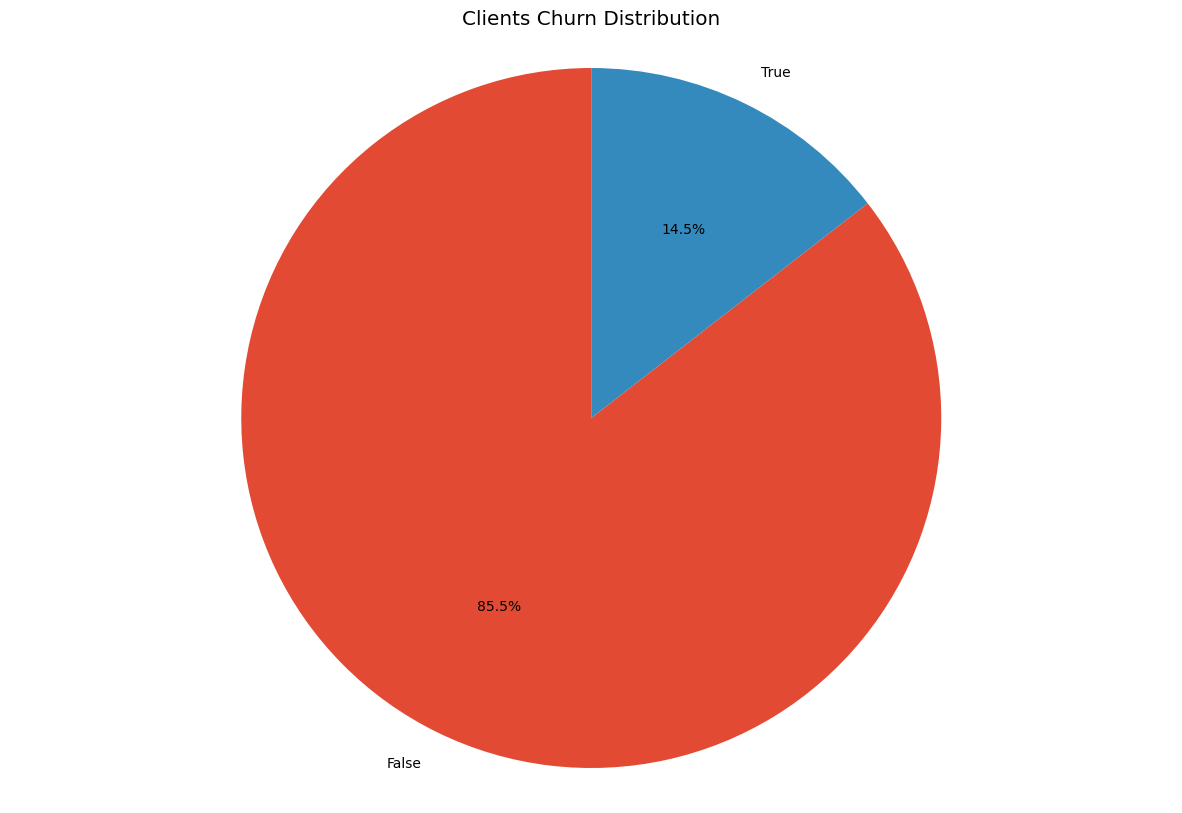

In [26]:
# representing the churn column using a Pie Chart to visualize the percentages
churncounts = df['churn'].value_counts()


plt.figure(figsize=(15, 10))

# Create a pie chart
plt.pie(churncounts, labels=churncounts.index, autopct='%1.1f%%', startangle=90)
plt.title('Clients Churn Distribution')
plt.axis('equal') 
plt.show()


Out of the 3333 customers in the dataset, 483 left the company. This translates to 14.5% customer loss.

The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

It is necessary to handle outliers in our dataset.Dealing with outliers provides crucial understanding the distribution of values for the different columns. Outliers can significantly impact the performance of machine learning models.

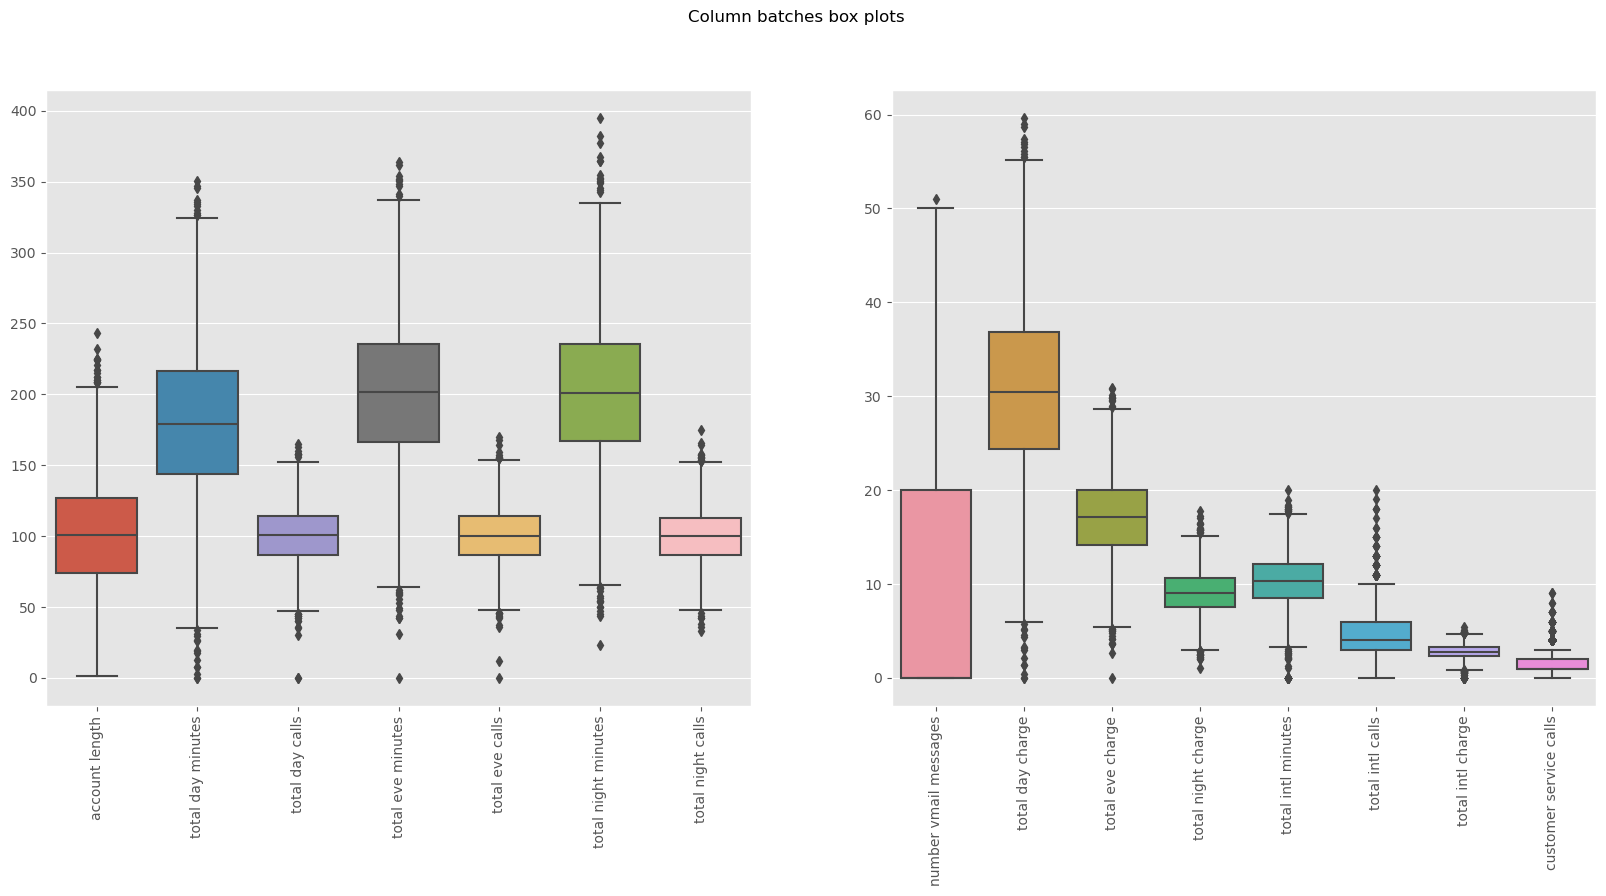

In [27]:
#Checking for outliers in the data
# List of columns for the first boxplot
colsbatch1 = ['account length','total day minutes','total day calls',
                'total eve minutes','total eve calls','total night minutes','total night calls']

# List of columns for the second boxplot
colsbatch2 = ['number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Create a figure with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Creating a boxplot for the first subset of columns in the first column batch
sns.boxplot(data=df[colsbatch1], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Creating a boxplot for the second subset of columns in the second column batch
sns.boxplot(data=df[colsbatch2], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

#setting the figure title
fig.suptitle('Column batches box plots')

# Show the plot
plt.show()

From the box boxplots above, It is clear that the columns have numerous outliers which may affect the performance of machine learning models 

As for our data, all these outliers contain valuable information, which will be very important to our models. 

### Bivariate Analysis
Bivariate analysis involves analyzing the relationship between two variables. I will examine the relationship between international plan  and voice mail plan with the target variable (customer churn) to understand how they are related.



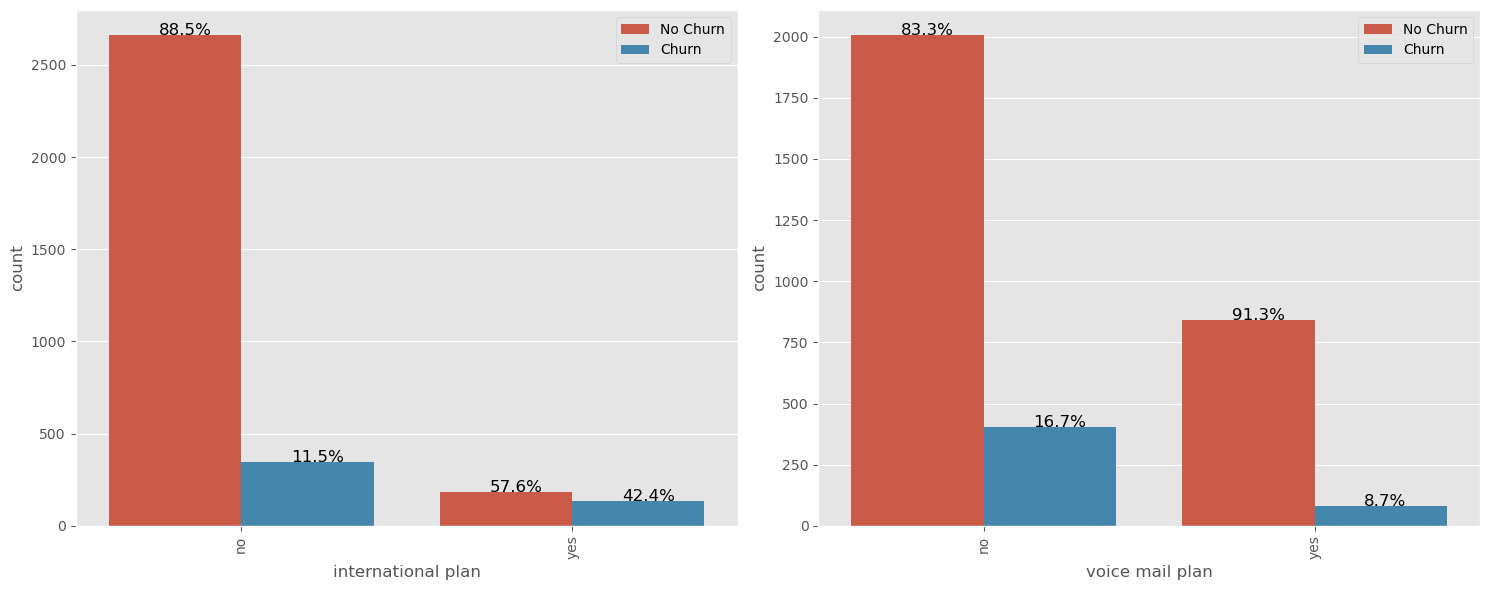

In [28]:
df_copy = df.copy()
df_copy ['churn'] = df_copy ['churn'].astype(str)
categoricalcolumns = ['international plan','voice mail plan']

fig, axes = plt.subplots(nrows=1, ncols=len(categoricalcolumns), figsize=(15, 6))

for i, col in enumerate(categoricalcolumns):
    ax = sns.countplot(x=col, hue="churn", data=df_copy, order=df_copy[col].value_counts().iloc[0:15].index, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles, ['No Churn', 'Churn'], loc="upper right")

    
    totals = df_copy .groupby(col)["churn"].count().values

 
    for j, p in enumerate(ax.patches):
        # Calculate the percentage of observations in each group
        percentage = '{:.1f}%'.format(100 * p.get_height()/totals[j % 2])
        # Add text annotations with the calculated percentages
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)

plt.tight_layout()
plt.show()

For the international plan, a higher proportion of customers who subscribed to the plan churned that is 42.4%  compared to those who did not subscribe 11.5%. This indicates that subscribing to the international plan may be associated with a higher likelihood of clients leaving. This could indicate that there are issues associated with the international plans that could be making the plan less preffered by the clients.

For the voice mail plan, a lower proportion of customers who subscribed to the plan churned that is 8.7% compared to those who did not subscribe 16.7%. This suggests that subscribing to the voice mail plan may be associated with a lower likelihood of churning.

C:\Users\petra.kibugu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\petra.kibugu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\petra.kibugu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\petra.kibugu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

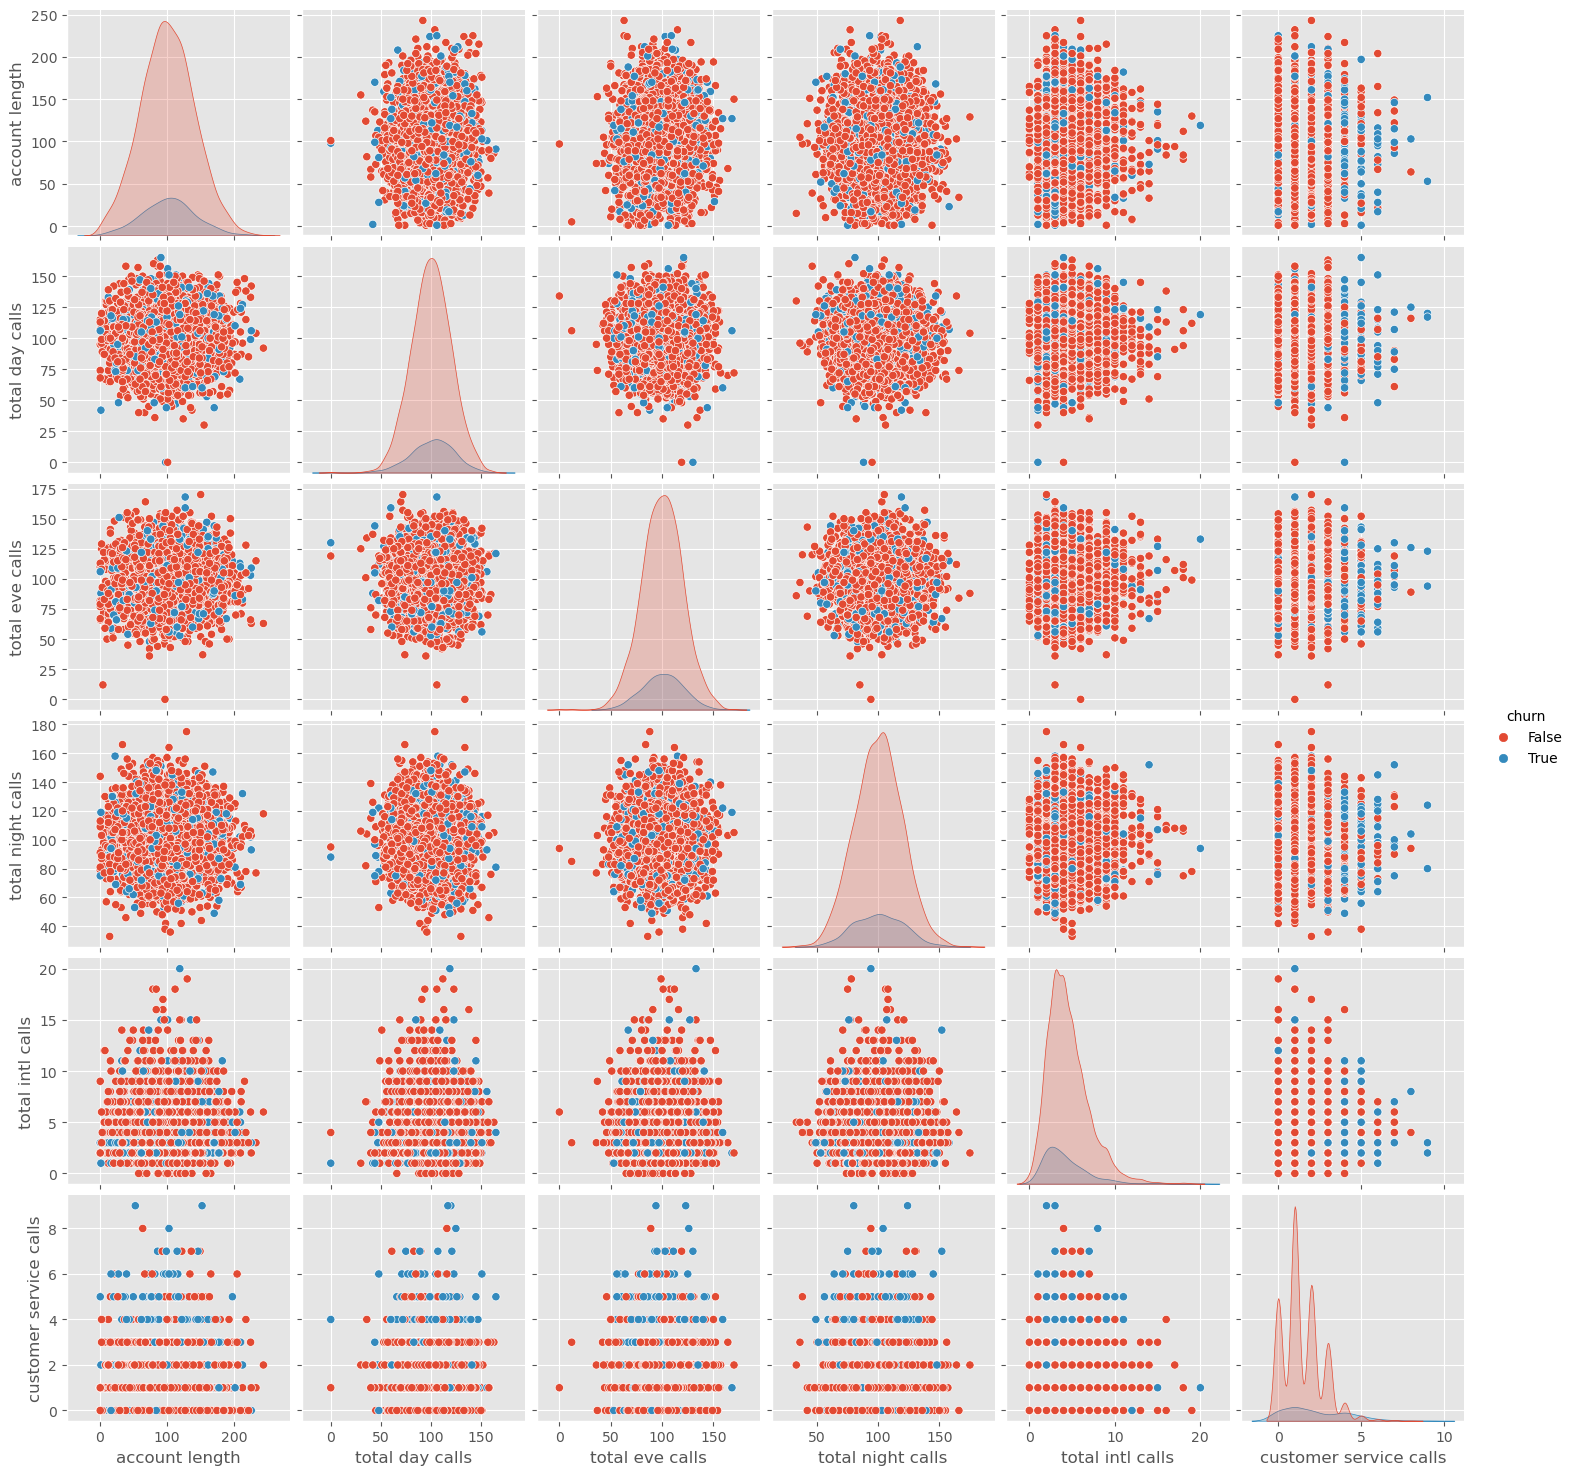

In [29]:
#plotting pairplots for numeric variables to understand the correlations between different features and customer churning
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

There appears to be a strong correlation between the number of customer service calls and the likelihood of churn. After four calls, customers are significantly more likely to discontinue their service.

This trend suggests that most customer service calls are linked to dissatisfaction. When customers make more than four calls, it likely indicates that their issues are not being resolved promptly, increasing the likelihood that they will leave.

### Multi-variate Analysis
Multivariate analysis involves analyzing the relationship between multiple variables simultaneously. In this case, I will explore the relationship between multiple features and the target variable (customer churn) to understand how they are related.



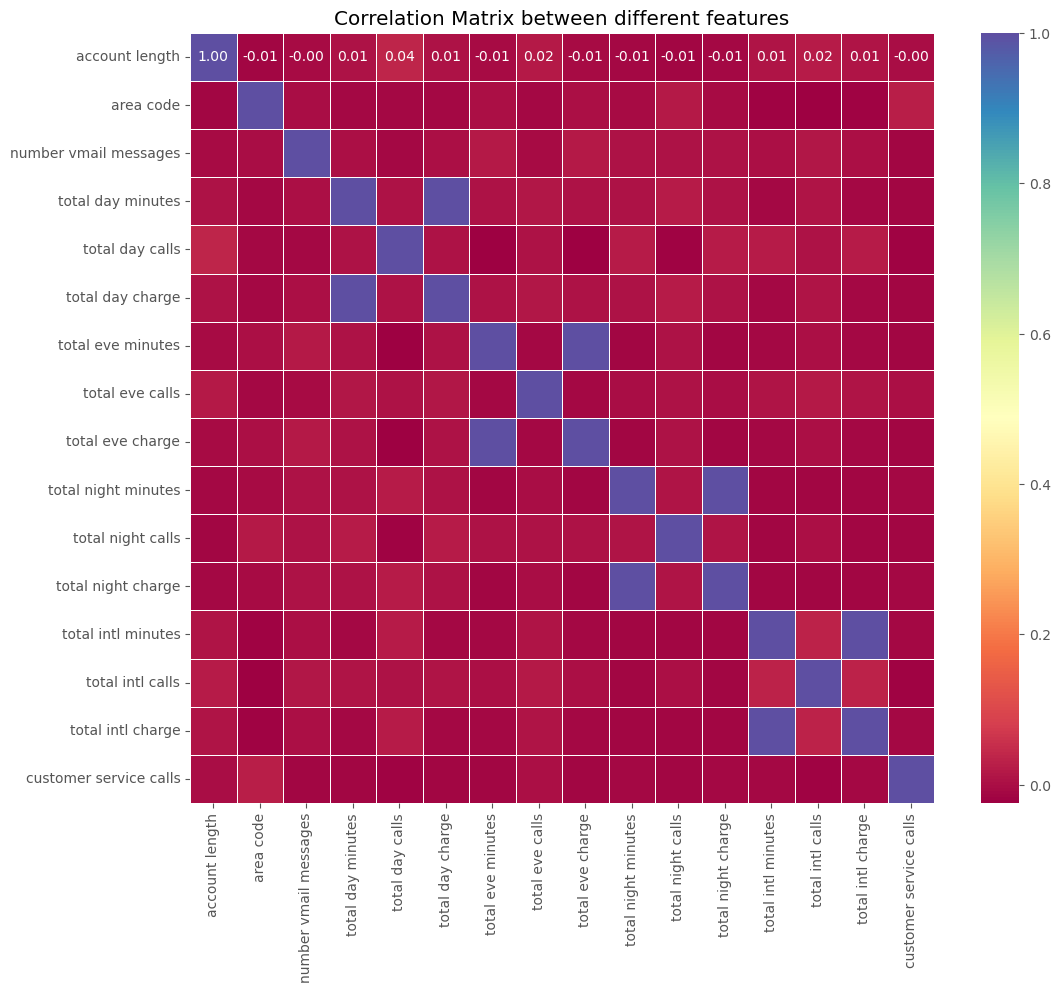

In [30]:
df2 = df.drop(columns=['international plan', 'voice mail plan','churn'])


corrmatrix = df2.corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corrmatrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between different features')
plt.show()

In the correlation matrix above, total international charge has a perfect correlation with total international minutes.This indicates multicollinearity. These two features appears to be independent, which means we can only use one when creating the model.

Other features identified as significantly correlated to the target variable are total minutes, total day charge, and customer service calls.

## Basic Data Preprocessing
In this section, I will preprocess the data to prepare it for modeling. This involves transforming both categorical and numeric columns into formats compatible with machine learning models. For example, categorical columns with object data types are converted to numerical values using one-hot encoding.

The dataset is then divided into training and testing sets. The training set is used to train the models, while the testing set is used to evaluate their performance, with cross-validation applied for robust results.

Additionally, we remove features with minimal or no impact on the target variables, employing techniques like ridge or lasso regression. Other frameworks may also be considered for feature selection.


In [31]:
#convert churn values to integer 1s and 0s
df['churn'] = df['churn'].astype(int)

#convert area code, international plan, and voice mail plan to integers 1s and 0s
df = pd.get_dummies(df, columns=['area code', 'international plan', 'voice mail plan'])

In [32]:
#display the first 10 records
df.head(10)

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,total intl charge,customer service calls,churn,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
phone number,,,,,,,,,,,,,,,,,,,,,
3824657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,2.70,1,0,False,True,False,True,False,False,True
3717191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,3.70,1,0,False,True,False,True,False,False,True
3581921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,3.29,0,0,False,True,False,True,False,True,False
3759999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,1.78,2,0,True,False,False,False,True,True,False
3306626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,2.73,3,0,False,True,False,False,True,True,False
3918027,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,1.70,0,0,False,False,True,False,True,True,False
3559993,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,2.03,3,0,False,False,True,True,False,False,True
3299001,147,0,157.0,79,26.69,103.1,94,8.76,211.8,96,...,1.92,0,0,False,True,False,False,True,True,False
3354719,117,0,184.5,97,31.37,351.6,80,29.89,215.8,90,...,2.35,1,0,True,False,False,True,False,True,False


In [33]:
# Separating features from the target variable
y = df['churn']
X = df.drop('churn', axis=1)


In [34]:
#split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling
In this section,I will create several models, evaluate them, then do some hyper-parameter tuning to try and improve the models.I intend to find the model and parameters that perform the best.

models to be created:
+ Logistic Regression Model

+ Decision Trees


### Model 1: Logistic Regression Model
The first model is a Logistic Regression model, which is a type of generalized linear model used to predict the probability of binary outcomes, such as customer churn.

In this instance, I will apply logistic regression to model the relationship between our features and the target variable.

In [35]:
# Creating a pipeline for preprocessing (only standardization, as there are no categorical columns)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)  # Apply standardization to all numerical columns
    ]
)

# Initializing the logistic regression model
logisticmodel = LogisticRegression()

# Create a pipeline that includes preprocessing and the logistic regression model
modelpipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logisticmodel)
])

# Fitting the model on the training data
modelpipeline.fit(X_train, y_train)

# Predicting churn for the train and test data
y_train_pred = modelpipeline.predict(X_train)
y_test_pred = modelpipeline.predict(X_test)

# Calculating the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing the train and test scores
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Printing the classification report for test data
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))





Train Accuracy: 0.86
Test Accuracy: 0.86
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667




**Accuracy:** The accuracy of the model is 86%
  Train Accuracy: 0.86
  Test Accuracy: 0.86


+ **Precision**: The precision for class 0 (not churned) is 87%. The precision for class 1 (churned) is 60%
+ **Recall**: The recall for class 0 (not churned) is 98% but the recall for class 1 (churned) is 18% only.
+ **F1-score**: The F1-score for class 0 (not churned) is 92% and for class 1 (churned) is only 27%. The F1-score for class 1 is low due to the low recall.

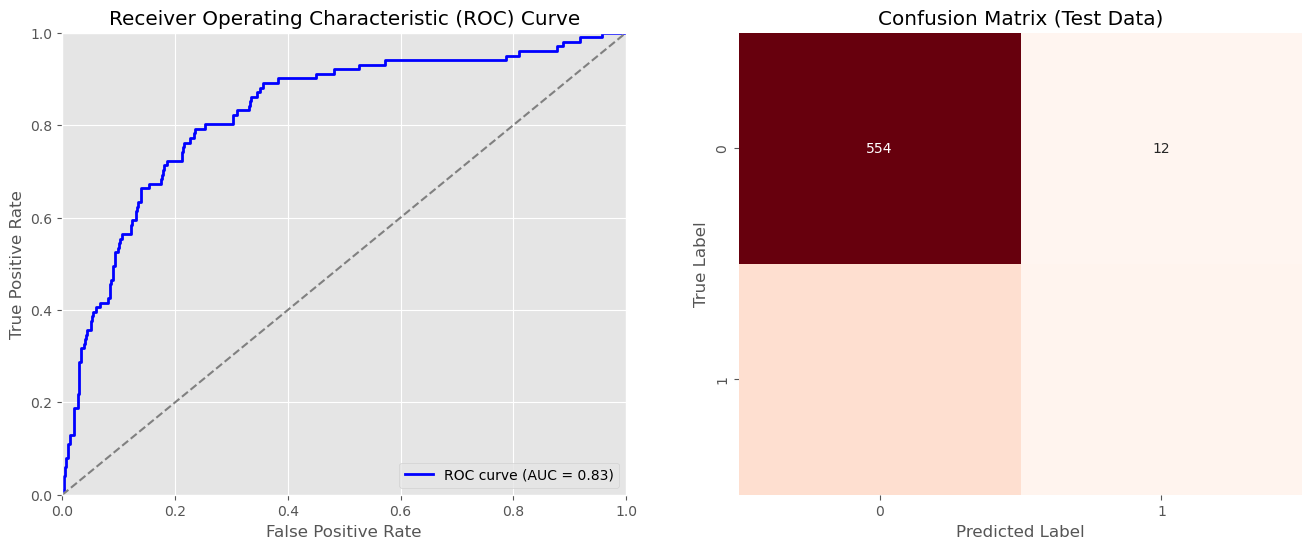

Confusion Matrix:
[[554  12]
 [ 83  18]]


In [36]:
# Plot the ROC curve for test data
y_prob = modelpipeline.predict_proba(X_test)[:, 1]  # Probability of positive class (churned)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot the confusion matrix as a heatmap for test data
confusion_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Reds', cbar=False, ax=ax2)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')
ax2.set_title('Confusion Matrix (Test Data)')

plt.show()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

**Confusion Matrix:**
+ The confusion matrix shows a total of 667 samples in the test set.
+ True Positives (TP): The model correctly predicted 18 samples as Not churned (class 0).
+ True Negatives (TN): The model correctly predicted 554 samples as churned (class 1).
+ False Positives (FP): The model incorrectly predicted 12 samples as churned when they were not churned.
+ False Negatives (FN): The model incorrectly predicted 83 samples as not churned when they were churned.

**The ROC curve  & The AUC**

The ROC curve and AUC provide insight into the model's ability to distinguish between churned and not churned customers. An AUC of 1 represents a perfect model, while an AUC of 0.5 suggests the model is no better than random guessing. In this case, the AUC is 0.83, indicating that the logistic regression model has good discriminatory power, significantly outperforming random guessing.

**Interpretation**:
The model excels at predicting the negative class (not churned), as shown by high accuracy, precision, and recall for class 0. However, it struggles with the positive class (churned), reflected in low precision, recall, and F1-score for class 1. This means the model is missing a significant number of customers who have actually churned, leading to a high number of false negatives and a failure to correctly identify churned customers.

**This model though better than guessing can have serious implications to the business as it fails to predict churned customers on a significant level**



**MODEL 1.2 LOGISTIC MODEL ADDRESSING CLASS IMBALANCE**

Trying to Adjust the model to adjust for class imbalance in the target variable to see if the model performs better

In [37]:
# Creating a pipeline for preprocessing (only standardization, as there are no categorical columns)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)  # Apply standardization to all numerical columns
    ]
)

# Initializing the logistic regression model with class_weight parameter
logisticmodel2 = LogisticRegression(class_weight='balanced')

# Creating a pipeline that includes preprocessing and the logistic regression model
modelpipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logisticmodel2)
])

# Fitting the model on the training data
modelpipeline.fit(X_train, y_train)

# Predicting churn for the test data
y_pred = modelpipeline.predict(X_test)

# Calculating the accuracy of the model on train and test data
train_accuracy = modelpipeline.score(X_train, y_train)
test_accuracy = modelpipeline.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Printing the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Train Accuracy: 0.77
Test Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       566
           1       0.39      0.77      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667

Confusion Matrix:
[[442 124]
 [ 23  78]]


**REBALANCED LOGISTIC MODEL INTEPRETATIONS**
Train Accuracy: 0.77 compared to previous model 0.86
Test Accuracy: 0.78 compared to the previous 0.86
Classification Report:
precision class 0 0.95 compared to previous 0.87
precision class 1 0.39 compared to 0.60
recall class 0 0.78 compared to 0.98
recall class 1 0.77 compared to 0.18
f1score class 0 0.86 compared to 0.92
f1score class 1 0.51 compared to 0.27

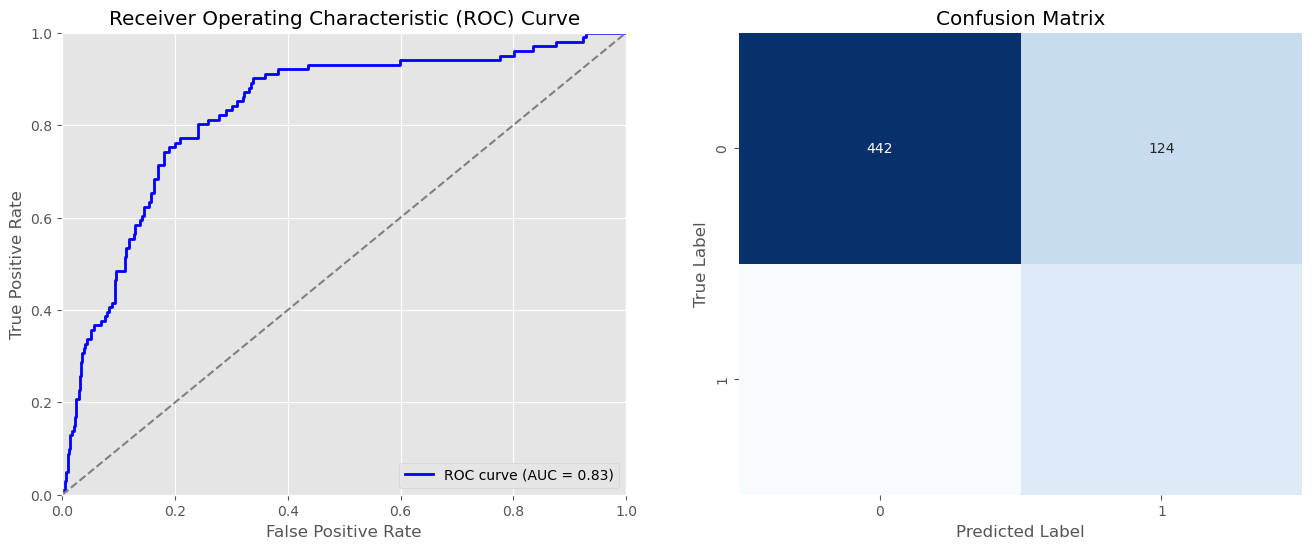

[[442 124]
 [ 23  78]]


In [38]:
# Plotting the ROC curve
y_prob = modelpipeline.predict_proba(X_test)[:, 1]  # Probability of positive class (churned)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot the confusion matrix as a heatmap
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues', cbar=False, ax=ax2)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')
ax2.set_title('Confusion Matrix')

plt.show()
print(confusion_matrix(y_test, y_pred))



Interpreting the classification report and confusion matrix:

1. Train Accuracy: 0.77
   Test Accuracy: 0.78

The model achieved an accuracy of 77% on the training data and 78% on the test data. This means that the model is performing relatively well on the unseen test data, which indicates that it is not overfitting.

2. Classification Report:
   
   - Precision: precision is 95%, meaning the model is correct 95% of the time when predicting a customer won't churn. For class 1 (churned), precision is only 39%, indicating lower confidence in predicting churn.

   - Recall:The model correctly identifies 78% of non-churned customers (class 0) and 77% of churned customers (class 1).

   - F1-score: The F1-score balances precision and recall, with 86% for class 0 and 51% for class 1.

  

3. Confusion Matrix:
   The confusion matrix provides a detailed breakdown of the model's performance in predicting each class.

   - True Negative (TN): 442 - The number of correctly predicted non-churned customers.
   - False Positive (FP): 124 - The number of non-churned customers incorrectly classified as churned.
   - False Negative (FN): 23 - The number of churned customers incorrectly classified as non-churned.
   - True Positive (TP): 78 - The number of correctly predicted churned customers.

4. ROC curve (AUC = 0.83):
 The AUC of 0.83 shows that the model has good ability to distinguish between churned and non-churned customers.

In summary, the model seems to perform well in predicting non-churned customers (class 0) with high precision and recall. However, its performance on predicting minority class (churned customers) (class 1) is not as good, with relatively lower precision and recall.

**There is a slight improvement on the previous model in predicting the churned customers comparing to guess work but the model is still not great**

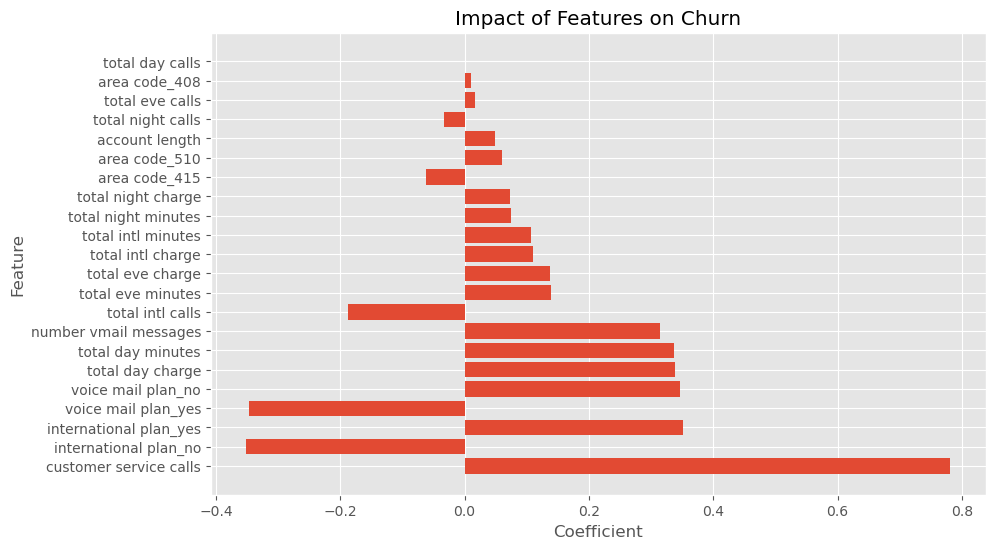

In [39]:
# Getting the coefficients of the logistic regression model2
coefficients = modelpipeline.named_steps['classifier'].coef_[0]

# Creating a DataFrame to display the coefficients along with the corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sorting the DataFrame by absolute coefficient values to see the most impactful features
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Impact of Features on Churn')
plt.show()


In [40]:
#see the actual coefficient arranged in descending ordger
coefficients_df


,Feature,Coefficient,Abs_Coefficient
14,customer service calls,0.781643,0.781643
18,international plan_no,-0.351737,0.351737
19,international plan_yes,0.351737,0.351737
21,voice mail plan_yes,-0.346152,0.346152
20,voice mail plan_no,0.346152,0.346152
4,total day charge,0.337942,0.337942
2,total day minutes,0.337680,0.337680
1,number vmail messages,0.314547,0.314547
12,total intl calls,-0.187955,0.187955
5,total eve minutes,0.139153,0.139153



The logistic regression model coefficients reveal the influence of each feature on the likelihood of customer churn:

**Positive Coefficients:** Indicate features that increase the likelihood of churn.
**Negative Coefficients:** Indicate features that decrease the likelihood of churn.\
**Key Insights:**\
High Positive Impact:

**Customer Service Calls:** The most significant factor, where more calls correlate with a higher likelihood of churn.
**Total Day Charge & Minutes:** Both increase the likelihood of churn as they rise.
**Voice Mail Plan (No):** Customers without a voice mail plan are more likely to churn.
**International Plan (Yes):** Having an international plan is linked to higher churn.
**Number of Voice Mail Messages**, Total Evening Minutes, Total International Charge: Increases in these also raise the likelihood of churn.
**Area Code 510:** Customers from this area are more likely to churn.

Negative Impact:

**Voice Mail Plan (Yes):** Customers with a voice mail plan are less likely to churn.
**International Plan (No):** Customers without an international plan are less likely to churn.
**Total International Calls:** More international calls reduce the likelihood of churn.
**Area Codes 415 & 408:** Customers from these areas are less likely to churn.
**Total Day & Night Calls:** More calls during these times slightly reduce the likelihood of churn.
Smaller Impacts:

**Account Length & Phone Number:** Slightly increase the likelihood of churn.

Understanding these features helps identify key factors contributing to customer churn, allowing targeted actions to reduce churn and retain customers.

## **Model 2: Decision Tree Classifier**



Based on the original split, I will train, test and evaluate the same using Decision Tree Classifier. 

In [41]:
#categorical_features = ['area_code_408', 'area_code_415', 'area_code_510', 'international_plan_no',
       #                 'international_plan_yes', 'voice_mail_plan_no', 'voice_mail_plan_yes']

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the encoded training data
clf.fit(X_train, y_train)

# Make predictions on the encoded testing data
y_pred = clf.predict(X_test)

In [42]:
# Evaluate the model's performance
clf_accuracy = accuracy_score(y_test, y_pred)
clf_precision = precision_score(y_test, y_pred)
clf_recall = recall_score(y_test, y_pred)
clf_f1 = f1_score(y_test, y_pred)

print('Accuracy ', clf_accuracy)
print('Precision ', clf_precision)
print('Recall ', clf_recall)
print('f1_Score ', clf_f1)

#Calculate train and test scores
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('train score ', train_score)
print('test score ', test_score)


Accuracy  0.9175412293853074
Precision  0.7169811320754716
Recall  0.7524752475247525
f1_Score  0.7342995169082124
train score  1.0
test score  0.9175412293853074


In [43]:
# importing the graphviz libration for generalization and visualization
from sklearn.tree import export_graphviz
import graphviz

In [45]:
# doing reneralization of the model
dotdata= export_graphviz(clf, out_file=None,
                    feature_names=X_test.columns,
                      class_names=['0', '1'],
                      filled=True, rounded=True,
                      special_characters=True)

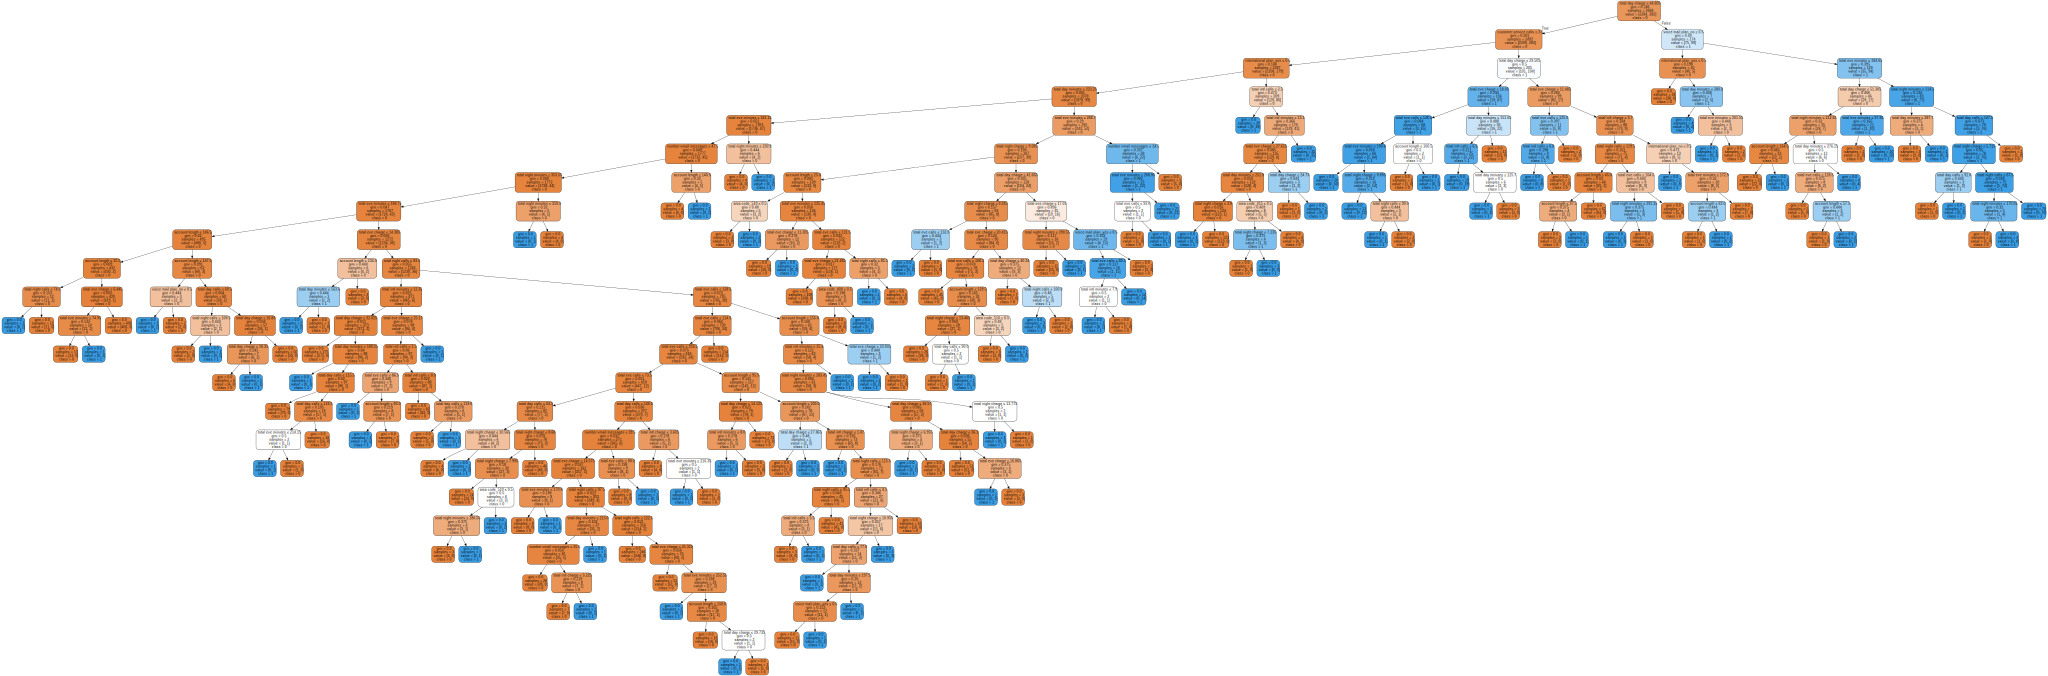

In [46]:
# Visualizing the model
graph1=graphviz.Source(dotdata)
graph1

**Decision Tree Classifier: Improving the model using SMOTE**

In [47]:
# Appling SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Training a Decision Tree Classifier on the oversampled data
dtsmote = DecisionTreeClassifier(random_state=42)
dtsmote.fit(X_train_smote, y_train_smote)

# Making predictions on the test set
y_pred_smote = dtsmote.predict(X_test)

# Calculating the accuracy of the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

# Generating a classification report
classification_rep_smote = classification_report(y_test, y_pred_smote)

print(classification_rep_smote)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       566
           1       0.66      0.73      0.69       101

    accuracy                           0.90       667
   macro avg       0.81      0.83      0.82       667
weighted avg       0.91      0.90      0.90       667



In [48]:
# Printing the evaluation metrics
print("Accuracy:", accuracy_smote)
print("Precision:", precision_smote)
print("Recall:", recall_smote)
print("F1-score:", f1_smote)

#Calculating train and test scores
train_score = dtsmote.score(X_train_smote, y_train_smote)
test_score = dtsmote.score(X_test, y_test)

print('train score', train_score)
print('test score', test_score)

Accuracy: 0.9025487256371814
Precision: 0.6607142857142857
Recall: 0.7326732673267327
F1-score: 0.6948356807511736
train score 1.0
test score 0.9025487256371814


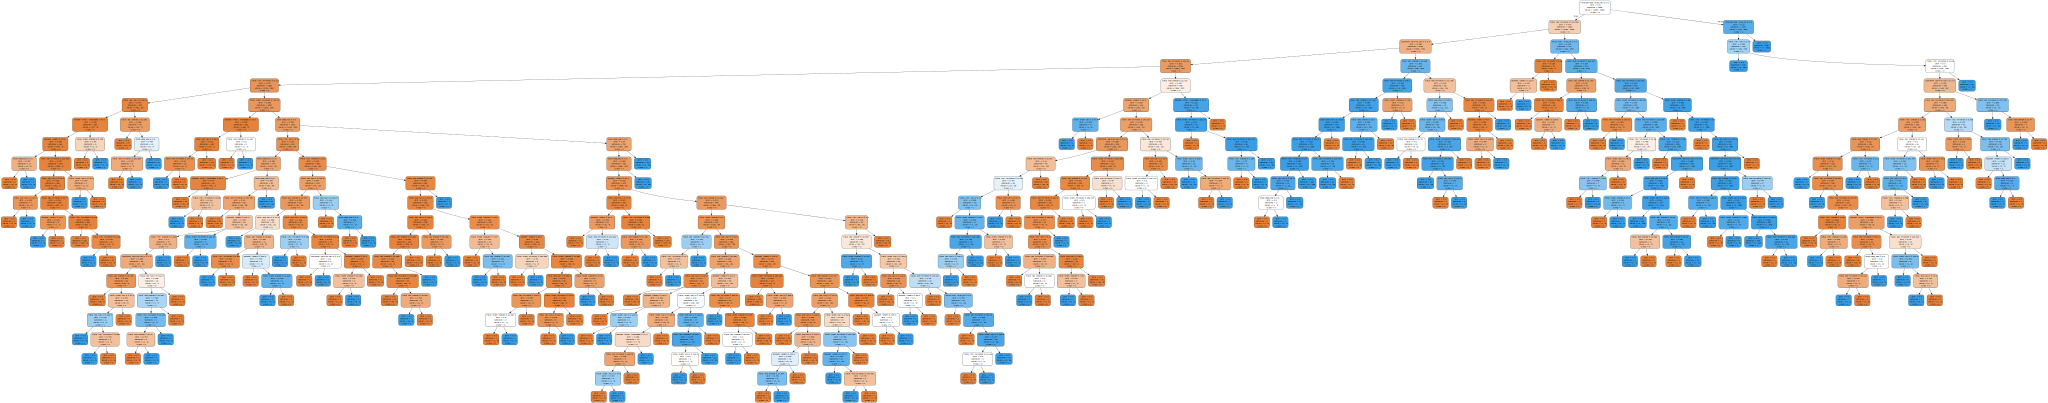

In [51]:
# doing reneralization of the model
dot_data= export_graphviz(dtsmote, out_file=None,
                    feature_names=X_test.columns,
                      class_names=['0', '1'],
                      filled=True, rounded=True,
                      special_characters=True)

# showing visualization of the decision tree
graph2=graphviz.Source(dot_data)
graph2

Based on above, the model performance did not improve. It is necessary to use a different technique to try to increase precision as failing to identify positive instances is a significant issue.

**Decision Tree Classifier: Improving the model using GridSeachCV**

Using GridSearch to do hyperparameter tuning to improve the model.

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
# Defining the parameter grid
parametergrid = {
    'max_depth': range(1,11),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 21, 2),
}

# Initializing the classifier
clf = DecisionTreeClassifier()

# Initializing a scorer for the grid search
scorer = make_scorer(accuracy_score)

# Initializing the grid search
gridobj = GridSearchCV(clf, parametergrid, scoring=scorer, cv=5)

# Fitting the grid search object to the data
gridobj = gridobj.fit(X_train, y_train)

# Getting the estimator
clf1 = gridobj.best_estimator_

# Fitting the best algorithm to the data
clf1.fit(X_train, y_train)

predictions = clf1.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,predictions))

# After fitting the grid search object to the data
print('Best Parameters: ', gridobj.best_params_)
print('Best Score: ', gridobj.best_score_)

# Making predictions on the test set
predictions = clf1.predict(X_test)

# Calculating and print the metrics
print('Accuracy: ', accuracy_score(y_test,predictions))
print('Precision: ', precision_score(y_test,predictions))
print('Recall: ', recall_score(y_test,predictions))
print('F1 Score: ', f1_score(y_test,predictions))

#Calculate train and test scores
train_score = clf1.score(X_train, y_train)
test_score = clf1.score(X_test, y_test)

print('train score ', train_score)
print('test score ', test_score)

Accuracy:  0.9475262368815592
Best Parameters:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best Score:  0.9414851979116161
Accuracy:  0.9475262368815592
Precision:  0.9125
Recall:  0.7227722772277227
F1 Score:  0.8066298342541437
train score  0.9632408102025506
test score  0.9475262368815592


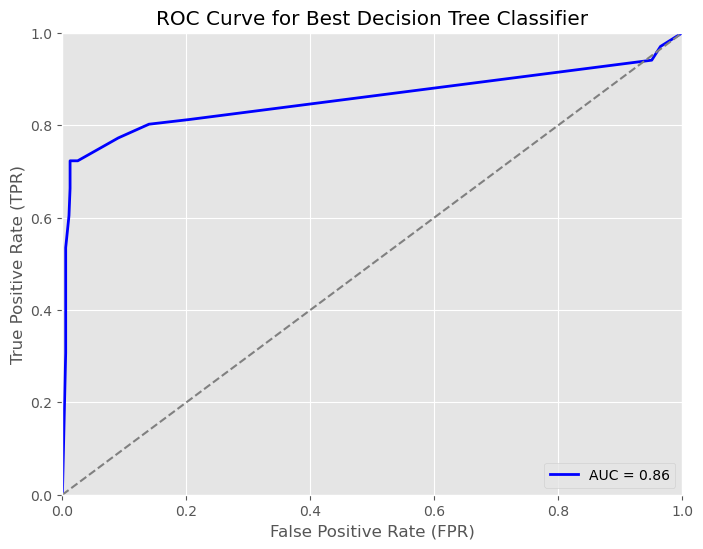

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Getting probability estimates for class 1 (positive class)
y_prob = clf1.predict_proba(X_test)[:, 1]

# Calculating the false positive rate (FPR), true positive rate (TPR), and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Best Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

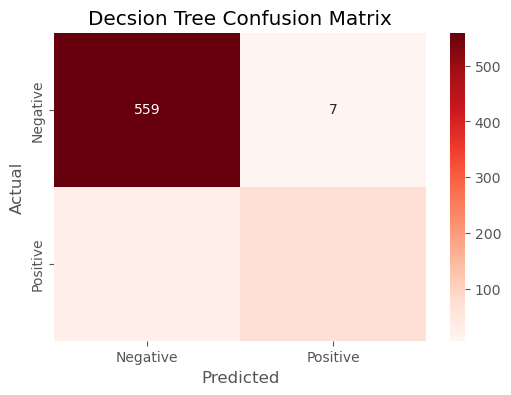

[[559   7]
 [ 28  73]]


In [55]:
# creating the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming predictions are the predictions from your classifier
confusionmatrixdt = confusion_matrix(y_test, predictions)

# Defining the labels for the matrix
labels = ['Negative', 'Positive']

# Creating a color map for the matrix
cmap = 'Reds'

# Plotting the confusion matrix with colors
plt.figure(figsize=(6, 4))
sns.heatmap(confusionmatrixdt, annot=True, fmt="d", cmap=cmap, xticklabels=labels, yticklabels=labels)
plt.title("Decsion Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion_matrix(y_test, predictions))

The model correctly predicted outcomes for 94.8% of the instances in the test set, indicating strong overall accuracy. When predicting positive instances, the model was correct 91.3% of the time. It successfully identified 72.3% of all actual positive cases, with an F1 score of 80.7%, showing a good balance between precision and recall, though there is room for improvement in recall.

The model's training accuracy is approximately 96.32%, reflecting that it has effectively learned patterns in the training data. The close match between the training score and the 94.8% test score suggests that the model generalizes well to new data without overfitting.

In conclusion, the model demonstrates strong performance with high accuracy and precision, though it may miss some positive instances. The similar train and test scores indicate good generalization, making this Decision Tree model, optimized with GridSearchCV, the best choice among decision classifiers.

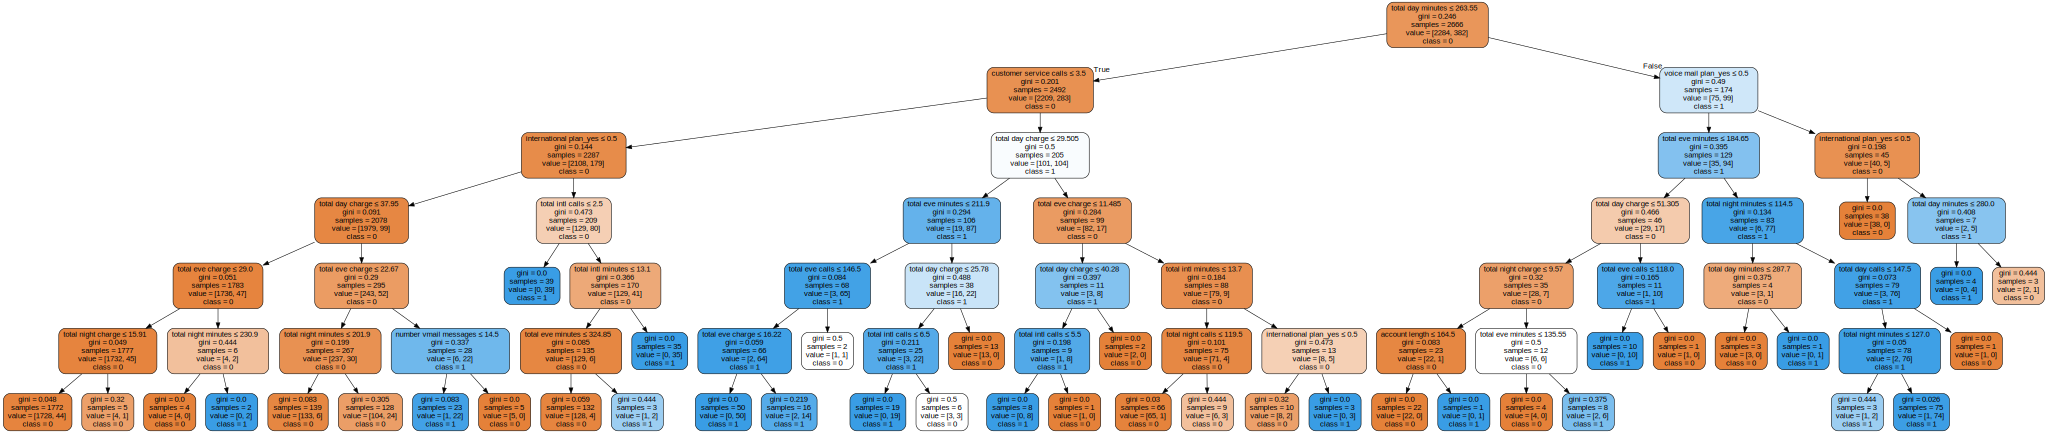

In [56]:
# doing reneralization of the model
dot_data= export_graphviz(clf1, out_file=None,
                    feature_names=X_test.columns,
                      class_names=['0', '1'],
                      filled=True, rounded=True,
                      special_characters=True)

# showing visualization of the decision tree
graph3=graphviz.Source(dot_data)
graph3

total day charge: 0.16362008986533297
total day minutes: 0.14644235968481822
customer service calls: 0.1439069905571981
total intl minutes: 0.11050626803604867
international plan_no: 0.10729391293427451
total intl calls: 0.08433123005519581
total eve charge: 0.06676046328636213
total eve minutes: 0.06387294423808744
voice mail plan_no: 0.0528717608386358
total night minutes: 0.02055648178605314
number vmail messages: 0.015614440436278436
total night charge: 0.007464769649568303
total eve calls: 0.005556995812990918
account length: 0.00397458483832542
total day calls: 0.003894954756438701
total night calls: 0.0033317532243913165
total intl charge: 0.0
churn: 0.0
area code_408: 0.0
area code_415: 0.0
area code_510: 0.0
international plan_yes: 0.0


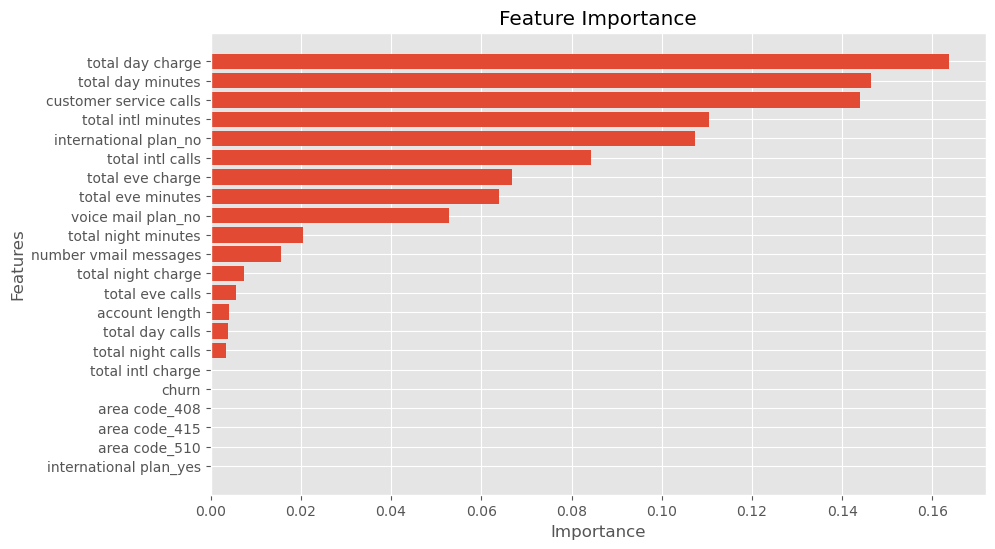

In [57]:
# Getting the feature importances from the model
importances = clf1.feature_importances_

# Creating a dictionary to store the feature importances
feature_importance_dict = {}

# Iterating over the column names and corresponding importances
for feature_name, importance in zip(df.columns, importances):
    feature_importance_dict[feature_name] = importance

# Sorting the feature importances in descending order
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Printing the sorted feature importances
for feature_name, importance in sorted_importances:
    print(f"{feature_name}: {importance}")

# Extracting the feature names and importances from the sorted list
feature_names = [feature[0] for feature in sorted_importances]
importances = [feature[1] for feature in sorted_importances]

# Reversing the lists to flip the order
feature_names = feature_names[::-1]
importances = importances[::-1]

# Plotting the feature importances as a bar graph
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

**Intepreting feature Importance**

The numbers next to each feature name indicate the relative importance of the feature in predicting the target variable. A higher value signifies a more important feature.

**Total day charge = 0.16362008986533297:** Customers with higher daytime charges are more likely to churn.

**Total day minutes = 0.14644235968481822:** The total duration of daytime calls is the the second-highest importance. Customers with longer daytime call durations may have higher engagement or usage, which can influence churn.



The remaining features continue with decreasing importance. It's important to note that features with an importance of 0.0 do not contribute significantly to the model's predictions.

COMPARISON TO CHOOSE THE BEST MODEL

In [59]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression',
                                        'Decision Trees Classifier'],
                                 'Accuracy (Test Set)':[0.78,0.95],
                                 'F1 Score (Test Set)':[0.51,0.81],
                                 'Recall (Test Set)':[0.77,0.73],
                                 'Precision (Test Set)':[0.39,0.90]})

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

,Model,Accuracy (Test Set),F1 Score (Test Set),Recall (Test Set),Precision (Test Set)
0,Logistic Regression,0.780000,0.510000,0.770000,0.390000
1,Decision Trees Classifier,0.950000,0.810000,0.730000,0.900000


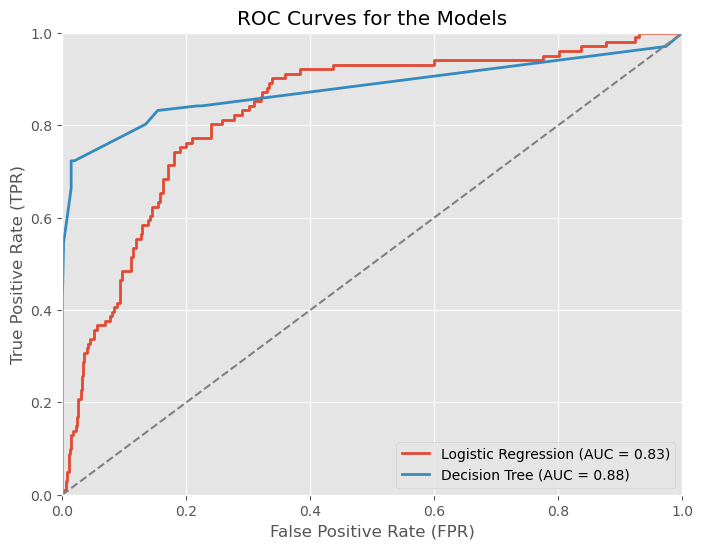

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

scaler = StandardScaler()
# Initializing the classifiers
lg = LogisticRegression(class_weight='balanced')
dt = DecisionTreeClassifier(max_depth=5, random_state=42)


classifiers = [lg, dt]
names = ['Logistic Regression', 'Decision Tree']

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(8, 6))

# Looping through each classifier and plot its ROC curve
for clf, name in zip(classifiers, names):
    clf.fit(X_train_scaled, y_train)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for the Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The ROC curves for Logistic Regression and Descision Tree were analyzed. The Descision Tree model performed better than the logistic model as it has a higher Area Under the Curve (AUC) and better classification performance, making it the most effective model for the given task.

Based on the provided metrics, the Decision Trees Classifier achieved the highest accuracy of 95% and F1-score of 81%. The logistic regression had the highest recall of 77%.


## Conclusions & Recommendations
In conclusion, the analysis suggests that we can accurately predict customer churn using a machine learning model, with the Descision Tree Classifier being the recommended model due to its strong overall performance. As this is the best performing model with an ROC curve that is on the upper left corner of the graph, hence giving us the largest AUC (Area Under the curve).

1. I would recommend that Syriatel uses the Descision Tree Classifier as the primary model for predicting customer churn. This model has a higher ROC curve and strong overall performance in terms of accuracy and F1-score on the test set, making it well-suited for accurately classifying customers as likely or unlikely to churn.

2. In terms of Business strategic recommendations for SyriaTel, I would recommend a Customer Retention strategy that addresses key features in relation to call minutes and charges. These efforts could include personalized offers or discounts on day charges. By implementing cost-effective strategies that address the key factors driving customer churn, SyriaTel can retain customers and minimize revenue loss.

3. I would recommend, that Syriatel comes up with strategies to reduce on Customer Service calls, as this is among the top features that would likely lead to Customer Churn. 